# Data manipulation

Manipulasi data adalah proses pengolahan dan transformasi data mentah menjadi format yang lebih terstruktur, relevan, dan mudah diinterpretasi. Proses ini melibatkan berbagai teknik untuk membersihkan, mengorganisir, dan mengubah data agar sesuai dengan tujuan analisis yang diinginkan. <hr>

# Praktek Data Manipulation


### 1. Business Understanding

Sebuah jaringan supermarket bertujuan untuk menganalisis data penjualannya untuk meningkatkan manajemen inventori, mengidentifikasi tren penjualan, dan meningkatkan kepuasan pelanggan. Dengan memahami pola penjualan, supermarket dapat mengoptimalkan tingkat persediaan, menyesuaikan strategi pemasaran, dan meningkatkan efisiensi operasional.

**Key Questions:**
- Produk apa yang paling laris?
- Waktu apa dalam sehari atau minggu yang memiliki penjualan tertinggi?
- Bagaimana kontribusi segmen pelanggan yang berbeda terhadap penjualan?
- Apa tren penjualan di berbagai cabang?

### 2. Data Dictionary
File `supermarket_sales.csv` berisi berbagai kolom, masing-masing mewakili atribut yang berbeda dari data penjualan. Berikut adalah deskripsi singkat dari setiap kolom:

| Nama Kolom               | Deskripsi                                |
|--------------------------|------------------------------------------|
| Invoice ID               | Identifikator unik untuk setiap faktur   |
| Branch                   | Cabang tempat transaksi terjadi          |
| City                     | Kota tempat cabang berada                |
| Customer type            | Jenis pelanggan (misalnya, Member, Normal)|
| Gender                   | Jenis kelamin pelanggan                  |
| Product line             | Kategori produk                          |
| Unit price               | Harga per unit produk                    |
| Quantity                 | Jumlah produk yang terjual               |
| Tax 5%                   | Pajak yang dikenakan pada penjualan      |
| Total                    | Jumlah total penjualan (termasuk pajak)  |
| Date                     | Tanggal transaksi                        |
| Time                     | Waktu transaksi                          |
| Payment                  | Metode pembayaran yang digunakan pelanggan|
| cogs                     | Biaya barang yang terjual                |
| gross margin percentage  | Persentase margin kotor                  |
| gross income             | Pendapatan kotor dari penjualan          |
| Rating                   | Penilaian pelanggan terhadap layanan/produk|

.

# Import Library dan Dataset

In [175]:
# --- Data Manipulation ----
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#--- Numerical Computation ----
import numpy as np

In [176]:
import pandas as pd

tea = {'type': ['green', 'black', 'black', 'herbal', 'herbal', 'herbal','herbal','oolong'],
        'name': ['sencha', 'chai', 'ceylon', 'mint', 'ginger', 'chamomile','tumeric','green oolong'],
        'temp' : [180, 210, 200, 212, 212, 200, 175, 190]
        }
tea = pd.DataFrame.from_dict(tea)
tea


,type,name,temp
0,green,sencha,180
1,black,chai,210
2,black,ceylon,200
3,herbal,mint,212
4,herbal,ginger,212
5,herbal,chamomile,200
6,herbal,tumeric,175
7,oolong,green oolong,190


In [177]:
mask = (tea['type']=='herbal') | (tea.temp >= 200)
tea.loc[mask]

,type,name,temp
1,black,chai,210
2,black,ceylon,200
3,herbal,mint,212
4,herbal,ginger,212
5,herbal,chamomile,200
6,herbal,tumeric,175


In [178]:
df = pd.read_csv("supermarket_sales.csv")

In [179]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
285,498-41-1961,B,Mandalay,Normal,Male,Health and beauty,66.68,5,16.670,350.070,2/20/2019,18:01,Cash,333.40,4.761905,16.670,7.6
897,409-49-6995,C,Naypyitaw,Member,Female,Food and beverages,47.27,6,14.181,297.801,2/5/2019,10:17,Cash,283.62,4.761905,14.181,8.8
105,704-48-3927,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.335,931.035,1/12/2019,14:50,Ewallet,886.70,4.761905,44.335,7.3
912,453-33-6436,A,Yangon,Normal,Female,Home and lifestyle,93.12,8,37.248,782.208,2/7/2019,10:09,Cash,744.96,4.761905,37.248,6.8
454,187-83-5490,A,Yangon,Member,Male,Electronic accessories,20.77,4,4.154,87.234,1/31/2019,13:47,Cash,83.08,4.761905,4.154,4.7


**Note** : <br>
sebelum melakukan manipulasi pada data yang dimiliki, langkah pertama yang krusial adalah memahami data yang dimiliki.


In [180]:
#--- data understanding ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

jika dipertahatikan jenis tipe data sudah sesuai, kecuali pada kolom Date karena masih berupa Object. kita akan mengubahnya menjadi tipe data `datetime64` dengan menggunakan bantuan fungsi dari pandas `pd.to_datetime(df[kolom],format="sesuaikan")`

In [181]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Filtering
Filtering digunakan untuk mengekstrak data spesifik berdasarkan kondisi tertentu.

In [182]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [183]:
df[df.Branch == 'A']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6


In [184]:
# filtering data untuk cabang tertentu
cabang_a = df[df['Branch'] == 'A']

cabang_a.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [185]:
# filtering data untuk cabang tertentu
# df[df['Branch'] == 'A']
city_yangon = df.loc[df['City'] == 'Yangon']
city_yangon.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6


`df[df['Branch'] == 'A']` digunakan untuk memfilter baris-baris dalam DataFrame `df` di mana nilai kolom `Branch` adalah 'A'. Berikut adalah penjelasan langkah demi langkah:

1. **`df['Branch'] == 'A'`**:
   - Ini adalah kondisi boolean yang memeriksa setiap baris di kolom `Branch` untuk melihat apakah nilainya sama dengan 'A'.
   - Hasil dari operasi ini adalah Series boolean di mana nilai `True` menunjukkan bahwa kondisi terpenuhi (kolom `Branch` bernilai 'A') dan `False` menunjukkan kondisi tidak terpenuhi.

2. **`df[...]`**:
   - Dengan memasukkan Series boolean ke dalam DataFrame `df`, kita memfilter baris-baris yang memenuhi kondisi tersebut.
   - Hanya baris-baris yang memiliki nilai `True` dalam Series boolean yang akan disertakan dalam hasil akhir.

### Operator Filter: `and` dan `or`
- Operator `and`
Operator `and` digunakan untuk memfilter baris yang memenuhi semua kondisi yang diberikan. Dalam pandas, kita menggunakan `&` untuk merepresentasikan `and`.

- Operator `or`
Operator `or` digunakan untuk memfilter baris yang memenuhi salah satu kondisi yang diberikan. Dalam pandas, kita menggunakan `|` untuk merepresentasikan `or`.

In [186]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [187]:
for col in df.columns:
  print(f'===={col}====')
  display(df[col].value_counts())

====Invoice ID====


,count
Invoice ID,
849-09-3807,1
750-67-8428,1
226-31-3081,1
631-41-3108,1
123-19-1176,1
373-73-7910,1
699-14-3026,1
355-53-5943,1
148-41-7930,1


====Branch====


,count
Branch,
A,340
B,332
C,328


====City====


,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


====Customer type====


,count
Customer type,
Member,501
Normal,499


====Gender====


,count
Gender,
Female,501
Male,499


====Product line====


,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


====Unit price====


,count
Unit price,
83.77,3
84.05,2
60.30,2
64.08,2
19.15,2
73.47,2
78.31,2
95.54,2
89.48,2


====Quantity====


,count
Quantity,
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90


====Tax 5%====


,count
Tax 5%,
4.4640,2
10.3635,2
12.5700,2
9.0045,2
4.1540,2
13.1880,2
8.3770,2
39.4800,2
10.3260,2


====Total====


,count
Total,
93.7440,2
217.6335,2
263.9700,2
189.0945,2
87.2340,2
276.9480,2
175.9170,2
829.0800,2
216.8460,2


====Date====


,count
Date,
2/7/2019,20
2/15/2019,19
3/2/2019,18
1/8/2019,18
3/14/2019,18
1/25/2019,17
3/5/2019,17
1/26/2019,17
1/23/2019,17


====Time====


,count
Time,
19:48,7
14:42,7
17:38,6
17:36,5
19:39,5
17:16,5
11:40,5
10:11,5
19:30,5


====Payment====


,count
Payment,
Ewallet,345
Cash,344
Credit card,311


====cogs====


,count
cogs,
89.28,2
207.27,2
251.40,2
180.09,2
83.08,2
263.76,2
167.54,2
789.60,2
206.52,2


====gross margin percentage====


,count
gross margin percentage,
4.761905,1000


====gross income====


,count
gross income,
4.4640,2
10.3635,2
12.5700,2
9.0045,2
4.1540,2
13.1880,2
8.3770,2
39.4800,2
10.3260,2


====Rating====


,count
Rating,
6.0,26
6.6,24
9.5,22
4.2,22
5.1,21
6.5,21
8.0,21
5.0,21
6.2,21


In [188]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [189]:
# (df['Branch'] == 'A') & (df['Customer type'] == 'Member') & (df['Product line'] == 'Health and beauty')

In [190]:
#Filter > 2 Kondisi dengan AND
#Filtering data untuk cabang A dan pelanggan Member
cabang_a_member = df[(df['Branch'] == 'A') & (df['Customer type'] == 'Member') & (df['Product line'] == 'Health and beauty')]
cabang_a_member

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
65,877-22-3308,A,Yangon,Member,Male,Health and beauty,15.87,10,7.9350,166.6350,3/13/2019,16:40,Cash,158.70,4.761905,7.9350,5.8
69,382-03-4532,A,Yangon,Member,Female,Health and beauty,18.33,1,0.9165,19.2465,2/2/2019,18:50,Cash,18.33,4.761905,0.9165,4.3
234,157-13-5295,A,Yangon,Member,Male,Health and beauty,51.94,10,25.9700,545.3700,3/9/2019,18:24,Ewallet,519.40,4.761905,25.9700,6.5
283,667-92-0055,A,Yangon,Member,Male,Health and beauty,99.83,6,29.9490,628.9290,3/4/2019,15:02,Ewallet,598.98,4.761905,29.9490,8.5
284,565-17-3836,A,Yangon,Member,Female,Health and beauty,47.67,4,9.5340,200.2140,3/12/2019,14:21,Cash,190.68,4.761905,9.5340,9.1
313,423-64-4619,A,Yangon,Member,Female,Health and beauty,15.55,9,6.9975,146.9475,3/7/2019,13:12,Cash,139.95,4.761905,6.9975,5.0


In [191]:
# filtering data untuk cabang A atau pelanggan Member atau produk dengan belanja barang diatas 5
filter_complex = df[(df['Branch'] == 'A') | ((df['Customer type'] == 'Member') & (df['Quantity'] > 5))]
filter_complex

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5


In [192]:
filter_complex.to_csv('filter_complex.csv', index=False)

sebelumnya kita telah memahami beberapa informasi melalui descriptive statistics, sekarang kita akan menggunakan informasi tersebut untuk melakukan filtering lebih lanjut untuk menganalisis data. <br>

**Pertanyaan**: <br>
1. Apa saja produk yang memiliki harga unit di atas rata-rata?

In [193]:
mean_unit_price = df['Unit price'].mean()
mean_unit_price

np.float64(55.67213)

In [194]:
# Contoh Filter: Unit price di atas rata-rata
df_filtered = df[df['Unit price'] > mean_unit_price]
df_filtered

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9


# Group By
Mengelompokkan data sangat penting untuk mengagregasi informasi berdasarkan kolom spesifik.

## Group By 1 Kolom

In [195]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [196]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [197]:
# Mengelompokkan berdasarkan product line dan menghitung total penjualan
penjualan_produk = df.groupby('Product line')['Total'].sum().reset_index()
penjualan_produk

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


Penjelasan Code : <br>
`df.groupby('Product line')['Total'].sum()` digunakan untuk mengelompokkan data berdasarkan kolom `Product line` dan menghitung total penjualan (`Total`) untuk setiap kategori produk. <br>

1. **`df.groupby('Product line')`**:
   - `groupby('Product line')` mengelompokkan data dalam DataFrame `df` berdasarkan nilai yang ada di kolom `Product line`.
   - Hasil dari operasi ini adalah objek GroupBy yang mengelompokkan data berdasarkan `Product line`.

2. **`['Total']`**:
   - Setelah pengelompokan, kita memilih kolom `Total` dari GroupBy object.
   - Ini berarti kita hanya fokus pada kolom `Total` untuk setiap grup yang telah dibentuk.

3. **`.sum()`**:
   - Fungsi `.sum()` digunakan untuk menjumlahkan nilai-nilai dalam kolom `Total` untuk setiap grup yang telah dibentuk berdasarkan `Product line`.
   - Hasilnya adalah DataFrame baru atau Series yang berisi total penjualan (`Total`) untuk setiap kategori produk (`Product line`).

## Group By 2 Kolom

In [198]:
# setiap branch pada masing-masing customer type, berapa jumlah total penjualannya ?
df.groupby(['Branch', 'Customer type'])['Total'].sum().reset_index()

,Branch,Customer type,Total
0,A,Member,53637.4755
1,A,Normal,52562.8950
2,B,Member,53704.6860
3,B,Normal,52492.9860
4,C,Member,56881.2825
5,C,Normal,53687.4240


In [199]:
df.groupby(['Branch', 'Customer type'])[['Total','Quantity']].agg(['sum']).reset_index()

,Branch,Customer type,Total,Quantity
,,,sum,sum
0,A,Member,53637.4755,964
1,A,Normal,52562.8950,895
2,B,Member,53704.6860,924
3,B,Normal,52492.9860,896
4,C,Member,56881.2825,897
5,C,Normal,53687.4240,934


In [200]:
# Mengelompokkan berdasarkan cabang dan jenis pelanggan, kemudian menghitung total penjualan
penjualan_cabang_pelanggan = df.groupby(['Branch', 'Customer type'])['Total'].sum().reset_index()
penjualan_cabang_pelanggan

,Branch,Customer type,Total
0,A,Member,53637.4755
1,A,Normal,52562.8950
2,B,Member,53704.6860
3,B,Normal,52492.9860
4,C,Member,56881.2825
5,C,Normal,53687.4240


Mengelompokkan data berdasarkan satu atau lebih kolom dan menghitung agregat. Misalnya, mengelompokkan berdasarkan Branch untuk melihat total penjualan per cabang. <br>

**Pertanyaan**: <br>
- Cabang mana yang memiliki total penjualan tertinggi?

In [201]:
df_grouped = df.groupby('Branch')['Total'].sum().reset_index()
df_grouped

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


### Multiple Aggregations
Dapat menggabungkan metode .agg() dengan .groupby() untuk menerapkan beberapa agregasi pada setiap kelompok.

**Pertanyaan :**<br>
Bagaimana jumlah maksimal, minimal, jumlah dari barang yang terjual di tiap Branch ?

In [202]:
df_multiple = df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()
df_multiple

,Branch,max,min,count
0,A,10,1,340
1,B,10,1,332
2,C,10,1,328


In [203]:
df_multiple = (df.groupby(['Branch', 'Customer type'])['Quantity']
 .agg(['max','min','count'])
 .reset_index()
 )

df_multiple

,Branch,Customer type,max,min,count
0,A,Member,10,1,167
1,A,Normal,10,1,173
2,B,Member,10,1,165
3,B,Normal,10,1,167
4,C,Member,10,1,169
5,C,Normal,10,1,159


# Sorting
Mengurutkan data membantu dalam mengorganisasi data untuk mendapatkan insight yang lebih baik.

Pimpinan ingin melihat transaksi dengan nilai penjualan tertinggi. Dengan mengurutkan data berdasarkan total penjualan, kamu bisa menunjukkan transaksi mana yang paling besar. <br>

**Pertanyaan:<br>**

Transaksi mana yang memiliki total penjualan tertinggi?

In [204]:
# Mengurutkan berdasarkan total penjualan secara menurun
penjualan_terurut = df.sort_values(by='Total', ascending=False)
penjualan_terurut.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,1039.29,2/8/2019,16:20,Credit card,989.8,4.761905,49.49,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,1/30/2019,20:23,Ewallet,985.2,4.761905,49.26,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,1/12/2019,16:18,Ewallet,975.0,4.761905,48.75,8.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,17:16,Ewallet,973.8,4.761905,48.69,4.4


Kode `df.sort_values(by='Total', ascending=False)` digunakan untuk mengurutkan baris-baris dalam DataFrame `df` berdasarkan nilai dalam kolom `Total` secara menurun (dari yang terbesar ke yang terkecil). Berikut penjelasan langkah demi langkah dari kode tersebut:

### Penjelasan Kode

1. **`df.sort_values(by='Total')`**:
   - Fungsi `sort_values` digunakan untuk mengurutkan baris-baris dalam DataFrame.
   - Parameter `by='Total'` menunjukkan bahwa pengurutan akan didasarkan pada kolom `Total`.

2. **`ascending=False`**:
   - Parameter `ascending=False` menunjukkan bahwa pengurutan akan dilakukan secara menurun (descending).
   - Jika diatur menjadi `True`, pengurutan akan dilakukan secara menaik (ascending).


In [205]:
df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()

,Branch,max,min,count
0,A,10,1,340
1,B,10,1,332
2,C,10,1,328


In [206]:
df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index().sort_values(by='count', ascending=True)
# descending -> besar ke kecil (True)
# ascending -> kecil ke besar (True)
# ascending False = Descending
# Descending False = Ascending

,Branch,max,min,count
2,C,10,1,328
1,B,10,1,332
0,A,10,1,340


In [207]:
group_branch = df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()

In [208]:
group_branch.sort_values(by='count', ascending=True)

,Branch,max,min,count
2,C,10,1,328
1,B,10,1,332
0,A,10,1,340


In [209]:
df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index().sort_values(by='Branch', ascending=False)

,Branch,max,min,count
2,C,10,1,328
1,B,10,1,332
0,A,10,1,340


In [210]:
df.groupby('Product line')['Quantity'].agg(['max','min','count']).reset_index().sort_values(by='Product line', ascending=False)

,Product line,max,min,count
5,Sports and travel,10,1,166
4,Home and lifestyle,10,1,160
3,Health and beauty,10,1,152
2,Food and beverages,10,1,174
1,Fashion accessories,10,1,178
0,Electronic accessories,10,1,170


In [211]:
df.groupby('Branch')['Quantity'].agg(['max','min','count']).sort_values(by='count', ascending=False)

,max,min,count
Branch,,,
A,10,1,340
B,10,1,332
C,10,1,328


# Pivoting
Pivoting merubah bentuk data untuk analisis yang lebih baik.

Tim manajemen ingin membandingkan penjualan setiap kategori produk di setiap gender. Dengan membuat pivot table, kamu bisa memberikan gambaran yang jelas tentang hal ini. <br>

**Pertanyaan: <br>**
Bagaimana total penjualan setiap kategori produk di setiap branch?

In [212]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [213]:
pd.pivot_table(df, index='Product line',  columns='Branch', values='Total')
# secara umum kalo ga ada aggfunc maka yg dihitung ialah rata-rata values

Branch,A,B,C
Product line,,,
Electronic accessories,305.285225,310.026245,344.890445
Fashion accessories,320.245265,264.730911,331.693385
Food and beverages,295.915526,304.297770,360.103864
Health and beauty,268.037298,376.993585,319.525500
Home and lifestyle,344.879931,350.983290,308.790067
Sports and travel,328.350839,322.390306,350.265067


In [214]:
# Membuat pivot table yang menunjukkan total penjualan untuk setiap product line per cabang
tabel_pivot = pd.pivot_table(df, values='Total', index='Product line', columns='Branch', aggfunc='sum')
tabel_pivot

Branch,A,B,C
Product line,,,
Electronic accessories,18317.1135,17051.4435,18968.9745
Fashion accessories,16332.5085,16413.3165,21560.0700
Food and beverages,17163.1005,15214.8885,23766.8550
Health and beauty,12597.7530,19980.6600,16615.3260
Home and lifestyle,22417.1955,17549.1645,13895.5530
Sports and travel,19372.6995,19988.1990,15761.9280


In [215]:
tabel_pivot_morethan_2_category = pd.pivot_table(df, values='Total', index=['Product line','Gender'], columns='Branch', aggfunc='sum')
tabel_pivot_morethan_2_category

Branch                                  A           B           C
Product line           Gender                                    
Electronic accessories Female   9966.2955   8166.5115   8969.2155
                       Male     8350.8180   8884.9320   9999.7590
Fashion accessories    Female   9836.2215   9081.4920  11519.6865
                       Male     6496.2870   7331.8245  10040.3835
Food and beverages     Female   6999.7620  10509.9960  15661.1595
                       Male    10163.3385   4704.8925   8105.6955
Health and beauty      Female   5714.8980   6400.3485   6445.7400
                       Male     6882.8550  13580.3115  10169.5860
Home and lifestyle     Female  12636.8130   9557.1315   7842.9330
                       Male     9780.3825   7992.0330   6052.6200
Sports and travel      Female   8115.1770   9212.8155  11246.7285
                       Male    11257.5225  10775.3835   4515.1995

1. **`pd.pivot_table`**:
   - Fungsi `pivot_table` dari pandas digunakan untuk membuat tabel pivot, yaitu alat analisis data yang memungkinkan kita untuk meringkas data berdasarkan berbagai kriteria.

2. **`df`**:
   - DataFrame `df` yang akan digunakan untuk membuat tabel pivot.

3. **`values='Total'`**:
   - Menentukan kolom `Total` sebagai nilai yang akan diaggregasi dalam tabel pivot.

4. **`index='Product line'`**:
   - Menentukan kolom `Product line` sebagai indeks baris dalam tabel pivot. Setiap nilai unik di kolom ini akan menjadi baris yang terpisah dalam tabel pivot.

5. **`columns='Branch'`**:
   - Menentukan kolom `Branch` sebagai kolom dalam tabel pivot. Setiap nilai unik di kolom ini akan menjadi kolom yang terpisah dalam tabel pivot.

6. **`aggfunc='sum'`**:
   - Menentukan fungsi agregasi yang akan digunakan untuk meringkas data. Dalam hal ini, fungsi agregasi yang digunakan adalah `sum` (penjumlahan), sehingga nilai-nilai dalam kolom `Total` akan dijumlahkan berdasarkan kombinasi dari `Product line` dan `Branch`.

# Crosstab
melihat hubungan antara data yang bersifat categorical

Manajer keuangan ingin tahu metode pembayaran apa yang paling sering digunakan customer. Dengan menggunakan crosstab, kamu bisa memberikan analisis yang diperlukan. <br>

**Pertanyaan: <br>**

Metode pembayaran apa yang paling sering digunakan oleh customer ?

In [216]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [217]:
df['Invoice ID'].value_counts()

,count
Invoice ID,
849-09-3807,1
750-67-8428,1
226-31-3081,1
631-41-3108,1
123-19-1176,1
373-73-7910,1
699-14-3026,1
355-53-5943,1
148-41-7930,1


In [218]:
crosstab = pd.crosstab(df['Payment'], df['Branch'])
crosstab

# bikin list : list_A, list_B
# for untuk list_A

Branch,A,B,C
Payment,,,
Cash,110,110,124
Credit card,104,109,98
Ewallet,126,113,106


In [246]:
pd.crosstab(df['Branch'], df['Payment'], df['Gender'])

ValueError: values cannot be used without an aggfunc.

In [220]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# crosstab = pd.crosstab(df['Branch'], df['Payment'], df['Gender'])
# crosstab
# ValueError: values cannot be used without an aggfunc.

In [ ]:
# pd.crosstab(df['Branch'], df['Payment'], df['City'])
# notes : butuh proses aggregate function sehingga ditampilkan dalam group by saja

1. **`pd.crosstab`**:
   - Fungsi `crosstab` dari pandas digunakan untuk menghitung frekuensi atau tabulasi silang dari dua (atau lebih) kolom kategori dalam DataFrame.

2. **`df['Branch']`**:
   - Menentukan kolom `Branch` sebagai indeks baris dalam tabel silang. Setiap nilai unik di kolom ini akan menjadi baris yang terpisah dalam tabel silang.

3. **`df['Payment']`**:
   - Menentukan kolom `Payment` sebagai kolom dalam tabel silang. Setiap nilai unik di kolom ini akan menjadi kolom yang terpisah dalam tabel silang.

# APPENDING
Gunakan pd.concat() untuk menggabungkan, atau menumpuk secara vertikal, beberapa DataFrame

In [221]:
data1 = {
    'Name': ['Alice', 'Bob'],
    'Age': [24, 27]
    }

df1 = pd.DataFrame(data1)
df1

,Name,Age
0,Alice,24
1,Bob,27


In [222]:
data2 = {
    'Name': ['Charlie'],
    'Age': [22]
    }
df2 = pd.DataFrame(data2)
df2

,Name,Age
0,Charlie,22


In [223]:
# Menggabungkan (menumpuk) DataFrame secara vertikal
append_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Menampilkan hasil
append_df

,Name,Age
0,Alice,24
1,Bob,27
2,Charlie,22


In [224]:
append_df = pd.concat([df1, df2], axis=0, ignore_index=False)
append_df

,Name,Age
0,Alice,24
1,Bob,27
0,Charlie,22


In [225]:
# Menggabungkan (menumpuk) DataFrame secara horizontal
append_df = pd.concat([df1, df2], axis=1, ignore_index=True)

# Menampilkan hasil
append_df

,0,1,2,3
0,Alice,24,Charlie,22.0
1,Bob,27,NaN,NaN


# Working with Date
Bekerja dengan tanggal melibatkan ekstraksi wawasan dari data tanggal dan waktu.

In [226]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [228]:
df["Date"] = pd.to_datetime(df["Date"],format="%m/%d/%Y")

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [230]:
# Ekstraksi Hari dalam Seminggu
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [232]:
# Ekstrak Bulan
df["Month"] = df["Date"].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2


In [243]:
# Fungsi untuk mengkategorikan waktu
def konversi_nama_bulan(x):
    if x == 1:
        return 'januari'
    elif x == 2:
        return 'februari'
    elif x == 3:
        return 'maret'
    elif x == 4:
        return 'april'
    elif x == 5:
        return 'mei'
    elif x == 6:
        return 'juni'
    elif x == 7:
        return 'juli'
    elif x == 8:
        return 'agust'
    elif x == 9:
        return 'sept'
    elif x == 10:
        return 'okt'
    elif x == 11:
        return 'nov'
    else:
        return 'desember'

In [244]:
# with apply
# df['month_name'] = df['Month'].apply(konversi_nama_bulan)
# Call pakai apply(lambda)
df['month_name'] = df['Month'].apply(lambda x: month_name(x))
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,januari,2019,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,maret,2019,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,maret,2019,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,januari,2019,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,februari,2019,Pagi


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [237]:
# ekstrak tahun
df["year"] = df["Date"].dt.year
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,januari,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,3,maret,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,maret,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,januari,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,februari,2019


In [238]:
df['year'].value_counts()

,count
year,
2019,1000


In [239]:
# Mengonversi kolom Time ke format datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
# df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%s').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [240]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,januari,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,maret,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,maret,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,januari,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,februari,2019


In [241]:
# Fungsi untuk mengkategorikan waktu
def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Pagi'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('15:00:00').time():
        return 'Siang'
    elif time >= pd.to_datetime('15:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Sore'
    else:
        return 'Malam'

In [242]:
df['Waktu'] = df['Time'].apply(categorize_time)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,januari,2019,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,maret,2019,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,maret,2019,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,januari,2019,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,februari,2019,Pagi


1. Ekstraksi Hari dalam Seminggu
```python
df['DayOfWeek'] = df['Date'].dt.day_name()
```
Kode ini menambahkan kolom baru `DayOfWeek` ke DataFrame `df` yang berisi nama hari dalam seminggu yang diekstrak dari kolom `Date`. Fungsi `dt.day_name()` digunakan untuk mendapatkan nama hari (misalnya, Senin, Selasa).

2. Ekstrak Bulan
```python
df["Month"] = df["Date"].dt.month
```
Kode ini menambahkan kolom baru `Month` ke DataFrame `df` yang berisi nomor bulan yang diekstrak dari kolom `Date`. Fungsi `dt.month` mengembalikan nomor bulan (1 hingga 12).

3. Ekstrak Tahun
```python
df["year"] = df["Date"].dt.year
```
Kode ini menambahkan kolom baru `year` ke DataFrame `df` yang berisi tahun yang diekstrak dari kolom `Date`. Fungsi `dt.year` mengembalikan tahun dari kolom `Date`.

4. Mengonversi Kolom `Time` ke Format `datetime`
```python
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
```
Kode ini mengonversi kolom `Time` dari string ke objek waktu (`datetime.time`). Fungsi `pd.to_datetime` digunakan untuk konversi, dengan format waktu 24 jam (`%H:%M`). Fungsi `dt.time` digunakan untuk mendapatkan hanya bagian waktu tanpa tanggal.

5. Fungsi untuk Mengkategorikan Waktu
```python
def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Pagi'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('15:00:00').time():
        return 'Siang'
    elif time >= pd.to_datetime('15:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Sore'
    else:
        return 'Malam'
```
Fungsi `categorize_time` mengambil objek waktu (`time`) sebagai argumen dan mengembalikan kategori waktu berdasarkan rentang waktu yang telah ditentukan:
- `Pagi`: 05:00 hingga 11:59
- `Siang`: 12:00 hingga 14:59
- `Sore`: 15:00 hingga 17:59
- `Malam`: 18:00 hingga 04:59

6. Mengaplikasikan Fungsi `categorize_time`
```python
df['Waktu'] = df['Time'].apply(categorize_time)
```
Kode ini menambahkan kolom baru `Waktu` ke DataFrame `df` yang berisi kategori waktu (Pagi, Siang, Sore, Malam) yang ditentukan oleh fungsi `categorize_time`. Fungsi `apply` digunakan untuk menerapkan `categorize_time` ke setiap elemen dalam kolom `Time`.

**Pertanyaan:**
Kapan waktu dengan penjualan tertinggi dalam sehari?

# Join

Menggabungkan data dari beberapa sumber untuk analisis yang lebih komprehensif.

In [261]:
df1 = pd.DataFrame(
    {

        "key": ["K0", "K1", "K2", "K3",'K4'],

        "A": ["A0", "A1", "A2", "A3",'A4'],

        "B": ["B0", "B1", "B2", "B3",'B4'],

    }

)
df2 = pd.DataFrame(
    {

        "key": ["K0", "K1", "K2", "K3",'K5'],

        "C": ["C0", "C1", "C2", "C3",'C5'],

        "D": ["D0", "D1", "D2", "D3",'D5'],

    }

)


In [262]:
df1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K4,A4,B4


In [263]:
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K5,C5,D5


In [264]:
result_inner = pd.merge(df1, df2, on="key", how='inner') # kalo ga ada how, maka defaultnya inner
result_inner

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [265]:
# https://www.educba.com/python-pandas-join/
result_left = pd.merge(df2, df1, on="key", how="left")
# pd.merge(urutan_table1, urutan_table2, on="key", how="left")
# df1 -> table 1 (sesuai urutan penulisan)
# df2 -> table 2 (sesuai urutan penulisan)
result_left

,key,C,D,A,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,A1,B1
2,K2,C2,D2,A2,B2
3,K3,C3,D3,A3,B3
4,K5,C5,D5,NaN,NaN


In [266]:
df1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K4,A4,B4


In [254]:
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K5,C5,D5


In [256]:
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K5,C5,D5


In [257]:
df1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K4,A4,B4


In [255]:
result_right = pd.merge(df1, df2, on="key", how="right")
result_right

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K5,NaN,NaN,C5,D5


In [267]:
result_outer = pd.merge(df1, df2, on="key", how="outer")
result_outer

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A4,B4,NaN,NaN
5,K5,NaN,NaN,C5,D5


In [268]:
df['Branch'].value_counts()

,count
Branch,
A,340
B,332
C,328


In [269]:
# Dataset detail cabang
detail_cabang = pd.DataFrame({
    'Branch': ['A', 'B', 'C','D','E'],
    'Manager': ['John', 'Doe', 'Smith','Kurnia','Anwar']
})
detail_cabang

,Branch,Manager
0,A,John
1,B,Doe
2,C,Smith
3,D,Kurnia
4,E,Anwar


In [272]:
# Join: Menggabungkan data penjualan dengan data cabang
df_joined = pd.merge(df, detail_cabang, on='Branch', how='inner')

df_joined.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year,Waktu,Manager
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,januari,2019,Siang,John
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,maret,2019,Pagi,Smith
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,maret,2019,Siang,John
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,januari,2019,Malam,John
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,februari,2019,Pagi,John


In [273]:
df_joined[df_joined['Manager'] == 'Kurnia']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year,Waktu,Manager


In [274]:
merge_cabang = pd.merge(detail_cabang,df, on='Branch', how='left')
merge_cabang

,Branch,Manager,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year,Waktu
0,A,John,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1.0,januari,2019.0,Siang
1,A,John,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3.0,maret,2019.0,Siang
2,A,John,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1.0,januari,2019.0,Malam
3,A,John,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2.0,februari,2019.0,Pagi
4,A,John,355-53-5943,Yangon,Member,Female,Electronic accessories,68.84,6.0,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,Monday,2.0,februari,2019.0,Siang
5,A,John,665-32-9167,Yangon,Member,Female,Health and beauty,36.26,2.0,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2,Thursday,1.0,januari,2019.0,Sore
6,A,John,365-64-0515,Yangon,Normal,Female,Electronic accessories,46.95,5.0,11.7375,246.4875,2019-02-12,10:25:00,Ewallet,234.75,4.761905,11.7375,7.1,Tuesday,2.0,februari,2019.0,Pagi
7,A,John,252-56-2699,Yangon,Normal,Male,Food and beverages,43.19,10.0,21.5950,453.4950,2019-02-07,16:48:00,Ewallet,431.90,4.761905,21.5950,8.2,Thursday,2.0,februari,2019.0,Sore
8,A,John,829-34-3910,Yangon,Normal,Female,Health and beauty,71.38,10.0,35.6900,749.4900,2019-03-29,19:21:00,Cash,713.80,4.761905,35.6900,5.7,Friday,3.0,maret,2019.0,Malam
9,A,John,656-95-9349,Yangon,Member,Female,Health and beauty,68.93,7.0,24.1255,506.6355,2019-03-11,11:03:00,Credit card,482.51,4.761905,24.1255,4.6,Monday,3.0,maret,2019.0,Pagi


## Feature Engineering : Data Transformation / Feature Scalling

In [ ]:
df.head()

In [ ]:
df['Quantity'].value_counts()

# Feature Scalling / Data Transformation
Proses perubahan nilai skala dengan pendekatan statistik, dengan mengubah nilai pada kolom numerik tapi tidak mengubah makna. Tekniknya :
1. StandarScaller
2. MinMaxScaller
### Notes :
Pada pembahasan kali ini, akan dilakukan pada kolom yang sama bertujuan untuk melakukan cara penggunaan libraries nya saja. Pada kolom : ['Total', 'Unit price']

# 1. Standar Scaller for Machine Learning

In [275]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [276]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,month_name,year,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,januari,2019,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,maret,2019,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,maret,2019,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,januari,2019,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,februari,2019,Pagi


In [277]:
from sklearn.preprocessing import StandardScaler

# Kolom-kolom yang ingin di-standarisasi
columns_to_stdscaller = ['Total', 'Unit price']

# Inisialisasi StandardScaler
scaler = StandardScaler()

In [278]:
# Menerapkan standarisasi ke data pelatihan (train)
train[['Total_stds', 'Unit price_stds']] = scaler.fit_transform(train[columns_to_stdscaller])

# Menerapkan standarisasi yang sama ke data uji (test)
test[['Total_stds', 'Unit price_stds']] = scaler.transform(test[columns_to_stdscaller])

In [279]:
train[['Total', 'Unit price','Total_stds', 'Unit price_stds']].head()

,Total,Unit price,Total_stds,Unit price_stds
29,235.2105,24.89,-0.345462,-1.160308
535,122.5245,16.67,-0.808736,-1.473301
695,458.6925,87.37,0.573317,1.218746
557,1034.4600,98.52,2.940413,1.643305
836,202.3350,38.54,-0.480619,-0.640556


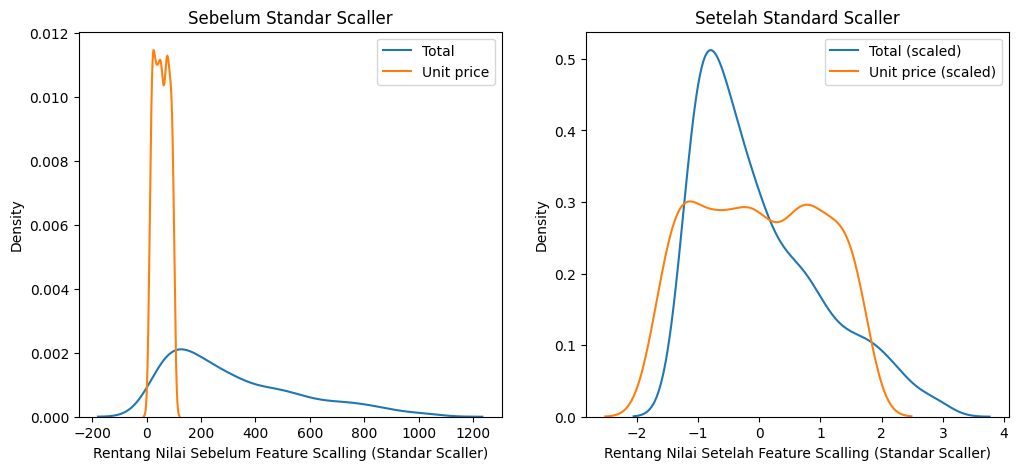

In [280]:
# kita lihat distribusi dari variabel sebelum standar scaller dan setelah standar scaller
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(train['Total'], ax=ax1, label='Total')
sns.kdeplot(train['Unit price'], ax=ax1, label='Unit price')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(train['Total_stds'], ax=ax2, label='Total (scaled)')
sns.kdeplot(train['Unit price_stds'], ax=ax2, label='Unit price (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [281]:
# Checking result of standar scaller process
train[['Total','Total_stds']].head()

,Total,Total_stds
29,235.2105,-0.345462
535,122.5245,-0.808736
695,458.6925,0.573317
557,1034.4600,2.940413
836,202.3350,-0.480619


In [282]:
# Checking statistical summary
# After standar scaller process the result has -> standar deviation (std) = 1 and mean = 0
train[['Total','Total_stds']].describe()
# 9.103829e-17 = 9.103829 x 10^-17 = 0.00000000000000009103829 ~ 0
# 8.000000e+02 = 8 x 10^2 = 800

,Total,Total_stds
count,800.000000,8.000000e+02
mean,319.239900,9.103829e-17
std,243.390166,1.000626e+00
min,12.694500,-1.260269e+00
25%,121.338000,-8.136142e-01
50%,253.596000,-2.698752e-01
75%,470.751750,6.228955e-01
max,1042.650000,2.974083e+00


# 2. Standar Scaller for Exploratory Data Analysis ? in Assignment
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

# 1. Minmax Scaller for Machine Learning

In [283]:
from sklearn.preprocessing import MinMaxScaler

# Kolom-kolom yang ingin dinormalisasi
columns_to_minmax = ['Total', 'Unit price']

# Inisialisasi MinMaxScaler
minmax = MinMaxScaler()

In [284]:
# Menerapkan normalisasi Min-Max ke data pelatihan (train)
train[['Total_minmax', 'Unit price_minmax']] = minmax.fit_transform(train[columns_to_minmax])

# Menerapkan normalisasi Min-Max yang sama ke data uji (test)
test[['Total_minmax', 'Unit price_minmax']] = minmax.transform(test[columns_to_minmax])

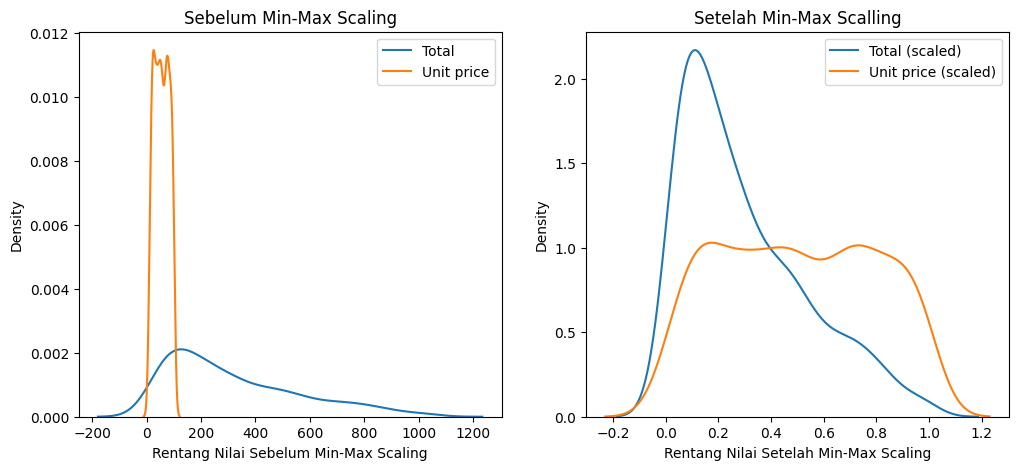

In [285]:
# Plot distribusi sebelum dan sesudah Min-Max Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Sebelum Min-Max Scaling')
sns.kdeplot(train['Total'], ax=ax1, label='Total')
sns.kdeplot(train['Unit price'], ax=ax1, label='Unit price')
# sns.kdeplot(train['Unit price'], ax=ax1, label='Unit price')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Min-Max Scalling')
sns.kdeplot(train['Total_minmax'], ax=ax2, label='Total (scaled)')
sns.kdeplot(train['Unit price_minmax'], ax=ax2, label='Unit price (scaled)')
# sns.kdeplot(train['Unit price'], ax=ax1, label='Unit price')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [289]:
# Checking result of standar scaller process
train[['Unit price','Unit price_minmax']].head()

,Unit price,Unit price_minmax
29,24.89,0.164775
535,16.67,0.073320
695,87.37,0.859924
557,98.52,0.983979
836,38.54,0.316644


In [290]:
# Checking statistical summary
# After standar scaller process the result has -> min (minimum) = 0 and max (maximum) = 1
train[['Unit price','Unit price_minmax']].describe()

,Unit price,Unit price_minmax
count,800.000000,800.000000
mean,55.362625,0.503812
std,26.278970,0.292378
min,10.080000,0.000000
25%,32.687500,0.251530
50%,54.700000,0.496440
75%,77.577500,0.750974
max,99.960000,1.000000


# 2. MinMax Scaller for Exploratory Data Analysis ? in Assignment
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

## Thank you :)